In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('Sentiments.csv')


In [3]:
df.head()

text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0                always worried money causing stress  
1               struggling make ends meet bills time  
2  feel like always living paycheck paycheck seem...  
3  worried never able debt achieve financial stab...  
4  constantly feeling guilty spending habits fina...

In [4]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:

import warnings  
warnings.filterwarnings("ignore") #ignore warnings


In [6]:
df['clean_text'] = df['text'].str.replace("[^a-zA-Z]", " ") 
df.head()


text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0  I m always worried about money  and it s causi...  
1  I m struggling to make ends meet and pay my bi...  
2  I feel like I m always living paycheck to payc...  
3  I m worried that I ll never be able to pay off...  
4  I m constantly feeling guilty about my spendin...

In [7]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [8]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [9]:
df['clean_text'] = df['clean_text'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0            always worried money causing lot stress  
1           struggling make ends meet pay bills time  
2  feel like always living paycheck paycheck seem...  
3  worried never able pay debt achieve financial ...  
4  constantly feeling guilty spending habits fina...

In [10]:
df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df.head()

text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0     [always, worried, money, causing, lot, stress]  
1   [struggling, make, ends, meet, pay, bills, time]  
2  [feel, like, always, living, paycheck, paychec...  
3  [worried, never, able, pay, debt, achieve, fin...  
4  [constantly, feeling, guilty, spending, habits...

In [11]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x]))
df.head()

text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0            always worried money causing lot stress  
1           struggling make ends meet pay bills time  
2  feel like always living paycheck paycheck seem...  
3  worried never able pay debt achieve financial ...  
4  constantly feeling guilty spending habits fina...

In [12]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

text  target  \
0  I'm always worried about money, and it's causi...       0   
1  I'm struggling to make ends meet and pay my bi...       0   
2  I feel like I'm always living paycheck to payc...       0   
3  I'm worried that I'll never be able to pay off...       0   
4  I'm constantly feeling guilty about my spendin...       0   

                                          clean_text  
0                always worried money causing stress  
1               struggling make ends meet bills time  
2  feel like always living paycheck paycheck seem...  
3  worried never able debt achieve financial stab...  
4  constantly feeling guilty spending habits fina...

# DATA VISUALIZATION

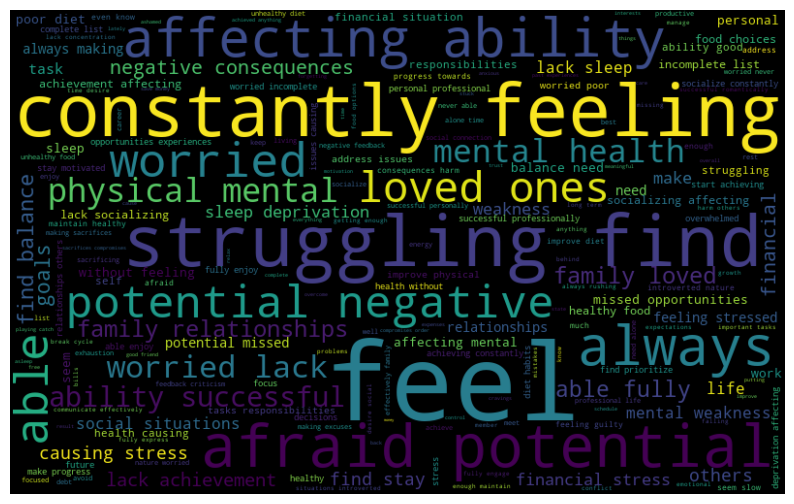

In [13]:
all_words = ' '.join([text for text in df['clean_text']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [14]:
df = df.astype({'target':int})
df.head()
df.dtypes

text          object
target         int32
clean_text    object
dtype: object

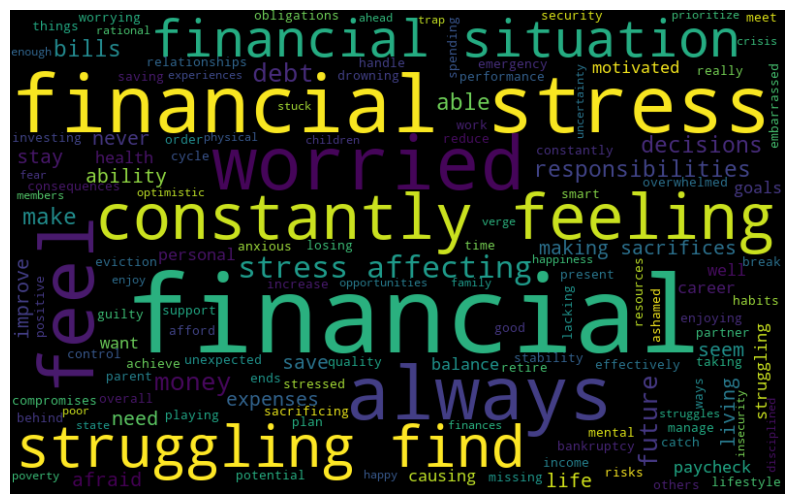

In [15]:
financial_words =' '.join([text for text in df['clean_text'][df['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(financial_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

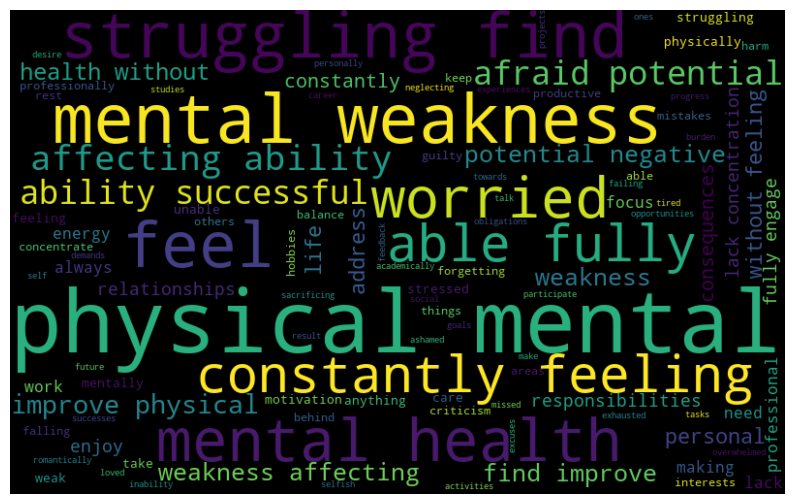

In [16]:
conc_words =' '.join([text for text in df['clean_text'][df['target'] == 7]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(conc_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model Training


In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics


In [18]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df['clean_text'])
cv.shape

(399, 427)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(cv, df['target'] , test_size=0.2, random_state=42)

# Logistic Regression


In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
prediction_lr = lr.predict(x_test)
print(accuracy_score(prediction_lr,y_test))

0.9125


0.9125


<Figure size 900x900 with 0 Axes>

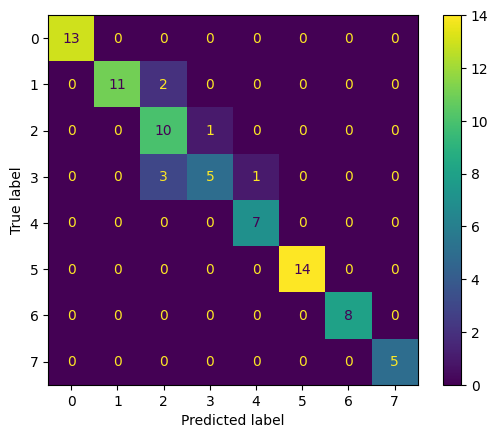

In [23]:
cm = metrics.confusion_matrix(y_test,prediction_lr)
# print(cm)

score = lr.score(x_test,y_test)
print(score)



cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize = (9,9))
cm_display.plot()
plt.show()

In [35]:
import joblib
joblib.dump(lr, 'nlp_model.pkl')
joblib.dump(count_vectorizer, 'cnt_vec.pkl')

['cnt_vec.pkl']

In [34]:
# Predicting a value
demo = ["my grandmother is ill, i'm unable to attend my class "]
demo = pd.Series(demo)
cv2 = count_vectorizer.transform(demo)
print(cv2)
print(cv2.shape)
pred = lr.predict(cv2)
print(pred)

  (0, 402)	1
(1, 427)
[3]
